In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pro3_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태        668111 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      668111 non-null  object 
 10  제품번호        668111 non-null  object 
 11  주문시간        668111 non-null  object 
 12  주문시_구분      668111 non-null  object 
 13  주문시간_DT     668111 non-null  object 
 14  물품명         668111 non-null  object 
 15  물품대분류       668111 non-null  object 
 16  물품중분류       668111 non-null  object 
 17  식품여부        668111 non-null  object 
 18  배달보관방식      668111 non-null  object 
 19  재분

In [7]:
df['등록카드'].value_counts()

등록카드
롯데카드      95363
국민은행      91322
기타        76429
신한은행      74272
농협중앙회     58498
우리은행      54352
신한카드      28926
국민카드      28127
기업은행      24549
하나은행      23236
BC카드      19314
현대카드      18489
삼성카드      15069
새마을금고     11543
부산은행       8515
SC제일은행     7494
광주은행       7126
씨티은행       6315
우체국        5701
대구은행       4279
신협중앙회      3218
외환은행       3154
미래에셋증권     2040
경남은행        780
Name: count, dtype: int64

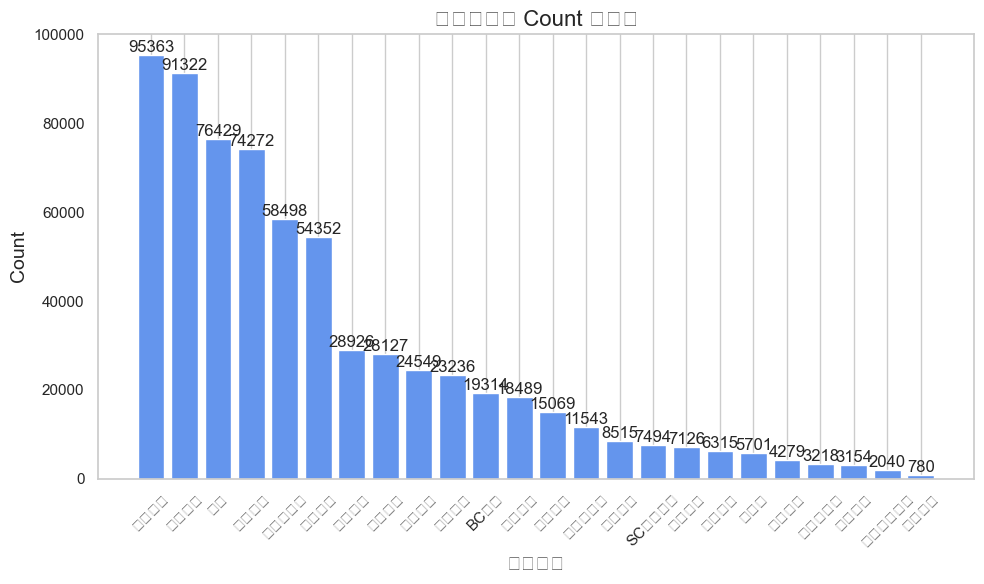

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. '등록카드'의 값 개수 세기
count_series = df1['등록카드'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(count_series.index, count_series.values, color='cornflowerblue')

# 타이틀과 축 라벨 추가
plt.title('등록카드의 Count 그래프', fontsize=16)
plt.xlabel('등록카드', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 막대 수치 표시
for i in range(len(count_series)):
    plt.text(i, count_series.values[i], count_series.values[i], ha='center', va='bottom')

# x축 레이블 회전
plt.xticks(rotation=45) 
plt.grid(axis='y')  # y축에 그리드 추가
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


# '재분류'그룹을 기준으로는 모두 농축수산물-가공식품-디저트 순임 
# 따라서 물품대분류로 구분 시도

롯데카드의 상위 3개 재분류:
      물품대분류  등록카드    횟수
88    두부/유부  롯데카드  6245
268  잎/줄기채소  롯데카드  6078
220       알  롯데카드  5560


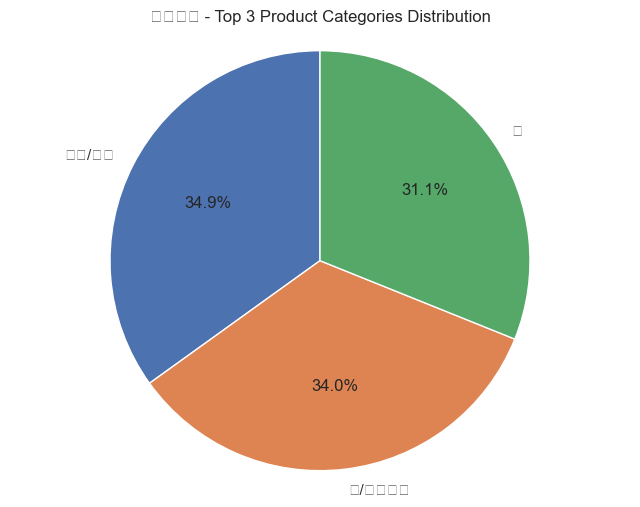

국민은행의 상위 3개 재분류:
      물품대분류  등록카드    횟수
85    두부/유부  국민은행  6564
265  잎/줄기채소  국민은행  5684
217       알  국민은행  5446


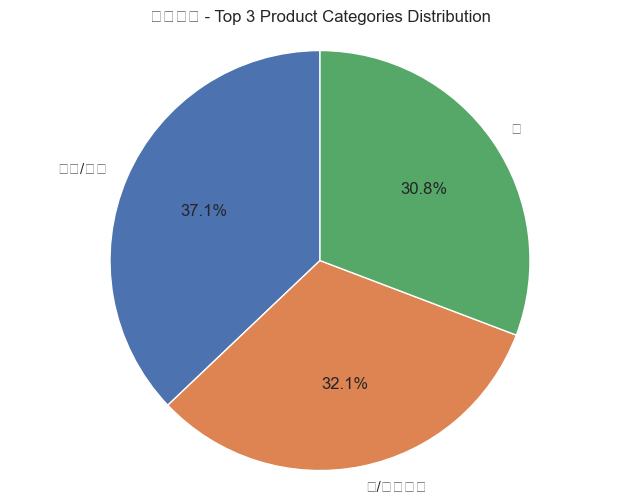

기타의 상위 3개 재분류:
      물품대분류 등록카드    횟수
86    두부/유부   기타  5321
266  잎/줄기채소   기타  4864
218       알   기타  4393


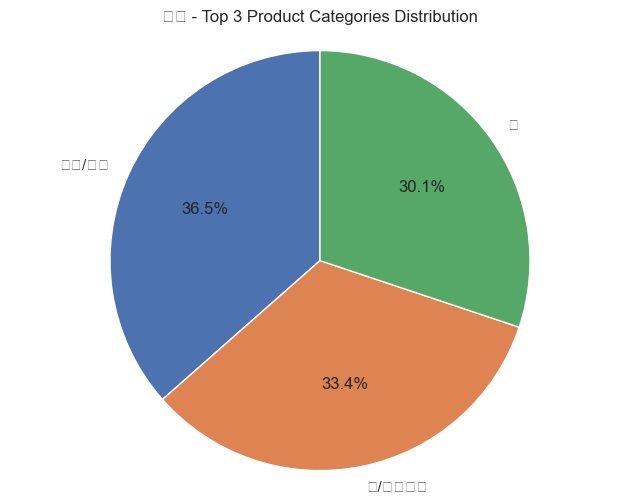

신한은행의 상위 3개 재분류:
      물품대분류  등록카드    횟수
89    두부/유부  신한은행  5367
269  잎/줄기채소  신한은행  4580
221       알  신한은행  4547


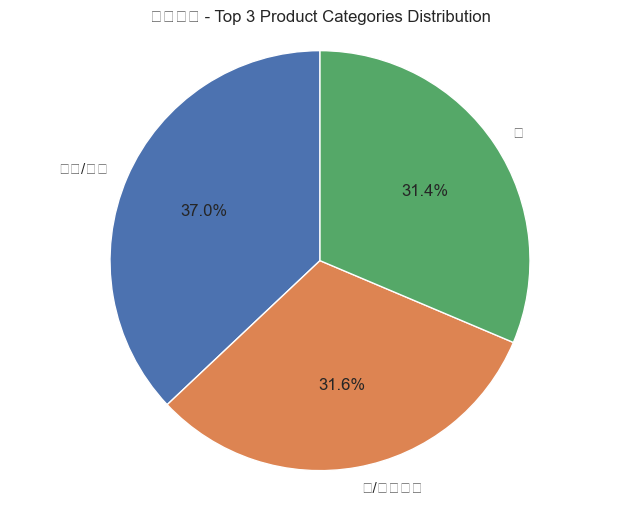

농협중앙회의 상위 3개 재분류:
      물품대분류   등록카드    횟수
87    두부/유부  농협중앙회  4113
219       알  농협중앙회  3364
267  잎/줄기채소  농협중앙회  3335


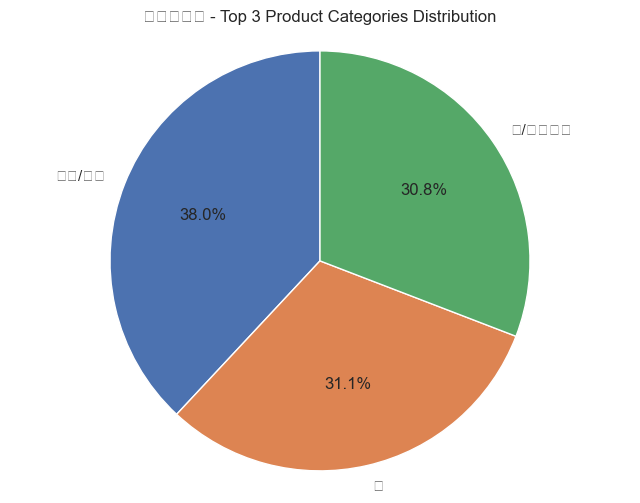

우리은행의 상위 3개 재분류:
      물품대분류  등록카드    횟수
90    두부/유부  우리은행  4164
270  잎/줄기채소  우리은행  3324
222       알  우리은행  2944


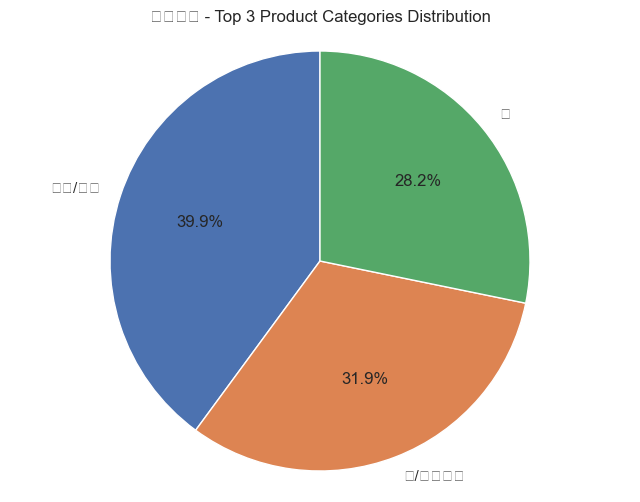

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 결제횟수 집계하여 상위 6개 등록카드 선정
top_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 2. 상위 6개 등록카드에 대해 데이터 필터링
filtered_data = df1[df1['등록카드'].isin(top_payment_cards)]

# 3. '재분류'그룹 기준으로 제품 선호 확인
# '재분류'로 제품의 선호도를 확인하기 위해 그룹화
grouped_data = filtered_data.groupby(['물품대분류', '등록카드']).size().reset_index(name='횟수')

# 4. 각 등록카드 및 해당 재분류에서 상위 3개 분류 구분
for card in top_payment_cards:
    # 특정 등록카드에 대한 데이터 필터링
    card_data = grouped_data[grouped_data['등록카드'] == card]
    
    # 상위 3개 분류 선택
    top_categories = card_data.nlargest(3, '횟수')
    
    # 결과 출력
    print(f"{card}의 상위 3개 재분류:")
    print(top_categories)

    # 5. 파이 차트 그리기
    plt.figure(figsize=(8, 6))
    plt.pie(top_categories['횟수'], labels=top_categories['물품대분류'], autopct='%1.1f%%', startangle=90)
    plt.title(f"{card} - Top 3 Product Categories Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


# 물품중분류로 시도 

롯데카드의 상위 3개 재분류:
        물품중분류  등록카드    횟수
539        두부  롯데카드  5638
407   논지엠오유정란  롯데카드  4200
1225       스낵  롯데카드  3191


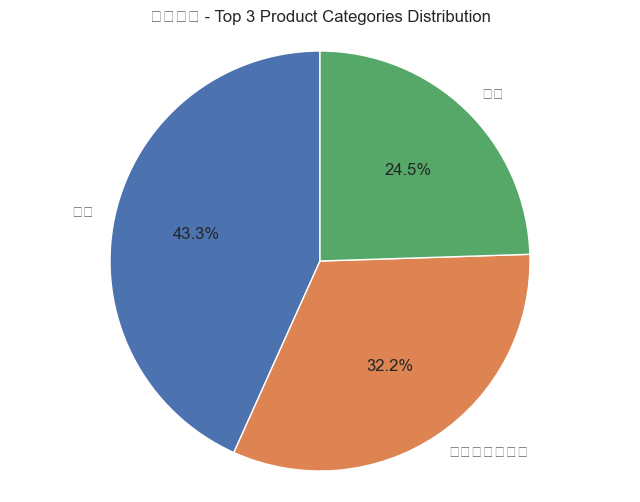

국민은행의 상위 3개 재분류:
        물품중분류  등록카드    횟수
536        두부  국민은행  5854
404   논지엠오유정란  국민은행  4076
1222       스낵  국민은행  3563


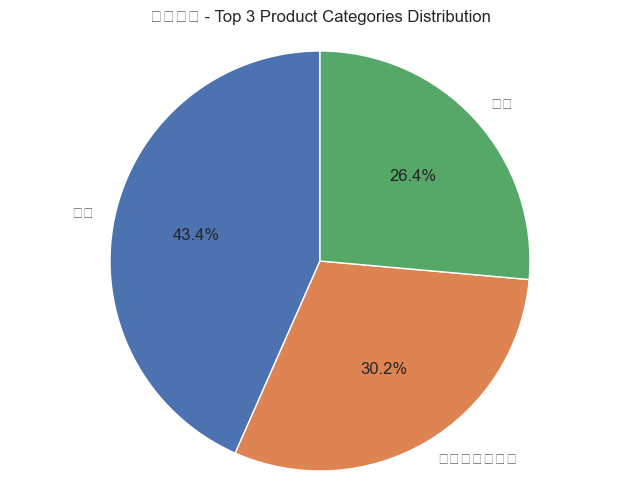

기타의 상위 3개 재분류:
        물품중분류 등록카드    횟수
537        두부   기타  4717
405   논지엠오유정란   기타  3280
1223       스낵   기타  3035


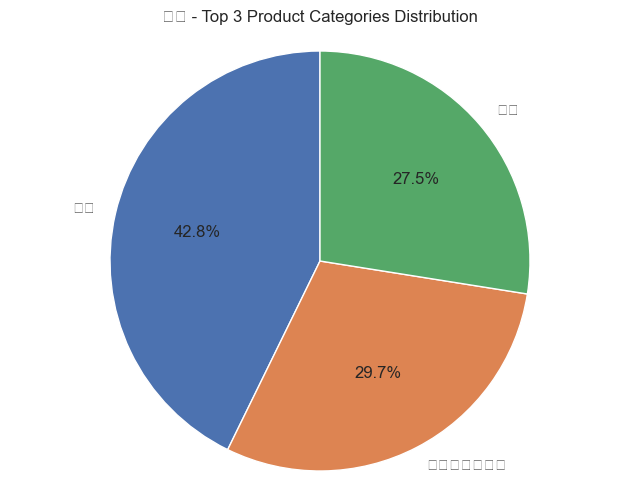

신한은행의 상위 3개 재분류:
        물품중분류  등록카드    횟수
540        두부  신한은행  4849
408   논지엠오유정란  신한은행  3311
1226       스낵  신한은행  2665


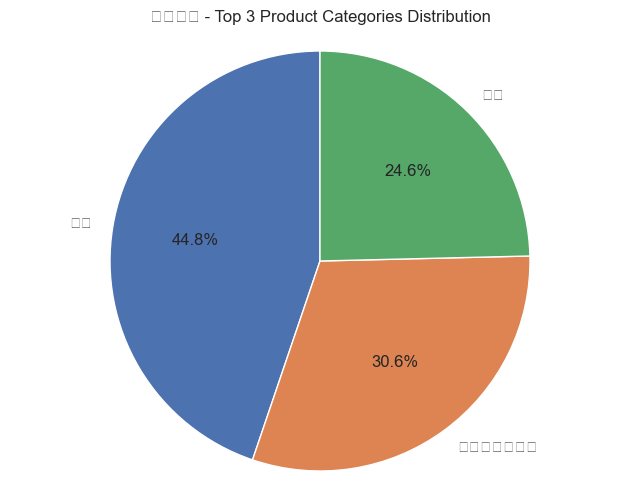

농협중앙회의 상위 3개 재분류:
        물품중분류   등록카드    횟수
538        두부  농협중앙회  3666
406   논지엠오유정란  농협중앙회  2405
1224       스낵  농협중앙회  2280


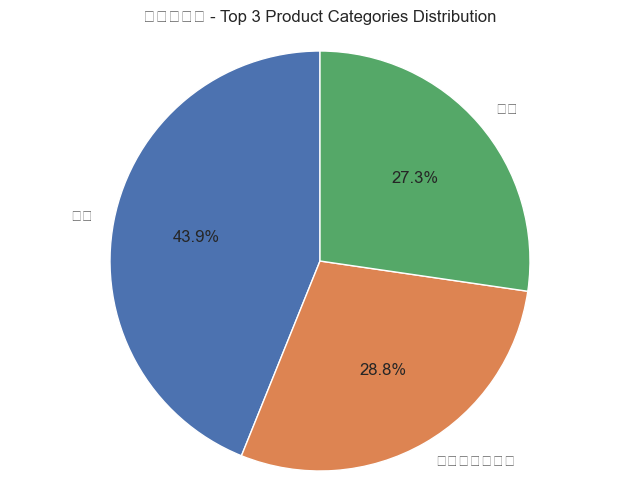

우리은행의 상위 3개 재분류:
        물품중분류  등록카드    횟수
541        두부  우리은행  3703
409   논지엠오유정란  우리은행  2188
1227       스낵  우리은행  1889


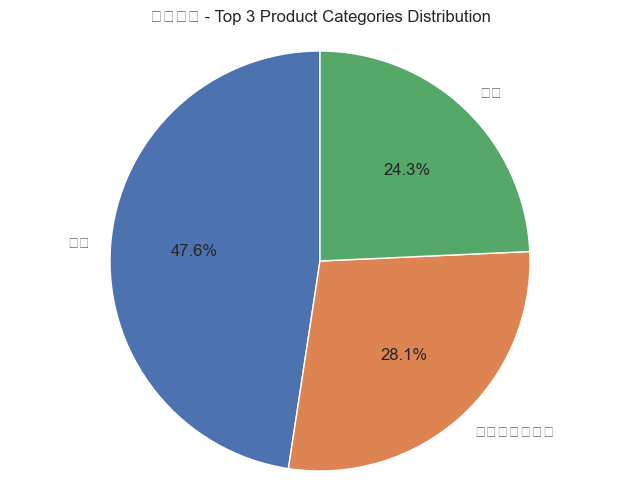

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
# df1 = pd.read_csv('pro3_data.csv')

# 1. 결제횟수 집계하여 상위 6개 등록카드 선정
top_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 2. 상위 6개 등록카드에 대해 데이터 필터링
filtered_data = df1[df1['등록카드'].isin(top_payment_cards)]

# 3. '재분류'그룹 기준으로 제품 선호 확인
# '재분류'로 제품의 선호도를 확인하기 위해 그룹화
grouped_data = filtered_data.groupby(['물품중분류', '등록카드']).size().reset_index(name='횟수')

# 4. 각 등록카드 및 해당 재분류에서 상위 3개 분류 구분
for card in top_payment_cards:
    # 특정 등록카드에 대한 데이터 필터링
    card_data = grouped_data[grouped_data['등록카드'] == card]
    
    # 상위 3개 분류 선택
    top_categories = card_data.nlargest(3, '횟수')
    
    # 결과 출력
    print(f"{card}의 상위 3개 재분류:")
    print(top_categories)

    # 5. 파이 차트 그리기
    plt.figure(figsize=(8, 6))
    plt.pie(top_categories['횟수'], labels=top_categories['물품중분류'], autopct='%1.1f%%', startangle=90)
    plt.title(f"{card} - Top 3 Product Categories Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# 결과적으로 두부-논지엠오유정란-스낵 순으로 모두 통일됨 카드사별 차이는 없는것으로 확인할 수 있음

In [46]:
df1['재분류'].value_counts()

재분류
농축수산물      240690
가공식품       140977
디저트         91662
기타          80579
곡류 및 가루     40000
생활/건강       32056
조미료         26774
즉석식품        15373
Name: count, dtype: int64

In [58]:
df1['물품중분류'].value_counts()

물품중분류
두부         42371
논지엠오유정란    29208
스낵         24471
우유/산양유     14480
콩나물        14276
           ...  
청갓             1
떡케이크/선물        1
가루/기타          1
오가피순           1
즙용브로컬리         1
Name: count, Length: 381, dtype: int64

In [67]:
df1['물품대분류'].value_counts()

물품대분류
두부/유부       47258
잎/줄기채소      41432
알           39295
과자          31179
음료          27840
열매채소        27252
양념채소        24583
유제품         23275
밀가공         23039
빵           21581
육가공         18903
뿌리채소        17575
과일          17400
콩나물         17348
떡           15379
버섯          14261
밑반찬         14083
과일채소        13477
냉동수산        12399
가루          11805
해조          11485
식사대용        11213
중량(정육)      10926
쌈채소류        10893
돼지          10608
소            9896
건어물          9842
어묵/묵         9840
세제/세안        9180
멥쌀           8864
닭/오리         8579
생활용품         8248
수산가공         7674
소스/기타양념      7572
기름/식초        7156
화장품          6768
콩/화본/깨       6195
건강일반         5707
장            5615
절임/장아찌       5060
생물수산         4661
즉석조리         4160
차            4083
말린나물/건재      3874
잼/병조림/기타     3758
견과           3221
찹쌀           2229
김치           2056
보리/혼합곡       1897
소금           1371
꿀            1134
유색미/발아미      1030
홍삼/녹용        1015
전통주           959
식기/편백         947
손질한채

In [69]:
import pandas as pd

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 일별 판매횟수 집계 (전체 데이터 기준)
daily_sales = df1.groupby(['주문일시', '제품번호']).size().reset_index(name='판매횟수')

# 3. 판매횟수 기준으로 상위 5개 제품 선택
top_5_products = daily_sales.groupby('제품번호')['판매횟수'].sum().nlargest(5).index.tolist()

# 4. 상위 5개 제품을 제외한 나머지 데이터
remaining_data = df1[~df1['제품번호'].isin(top_5_products)]

# 5. 나머지 데이터에서 물품대분류별로 그룹화하여 판매횟수 계산
category_sales = remaining_data.groupby('물품대분류')['제품번호'].value_counts().reset_index(name='판매횟수')

# 6. 물품대분류별 상위 5개 품목 선택
top_categories = category_sales.groupby('물품대분류')['판매횟수'].sum().nlargest(5).reset_index()

# 출력 결과
print("물품대분류 기준으로 상위 5개 품목:")
print(top_categories)


물품대분류 기준으로 상위 5개 품목:
    물품대분류   판매횟수
0  잎/줄기채소  41432
1      과자  31179
2      음료  27840
3    열매채소  27252
4     유제품  23275


In [71]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180902 entries, 0 to 180901
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   주문일시    180902 non-null  object
 1   제품번호    180902 non-null  object
 2   판매횟수    180902 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [114]:
top_5_categories

['두부/유부', '잎/줄기채소', '알', '과자', '음료']

In [112]:
import pandas as pd

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 물품대분류 기준으로 판매횟수 집계
category_counts = df1['물품대분류'].value_counts()

# 3. 판매횟수 기준으로 상위 5개 품목 선택
top_5_categories = category_counts.nlargest(5).index.tolist()

# 4. 상위 5개 품목을 제외한 나머지 데이터
remaining_data = df1[~df1['물품대분류'].isin(top_5_categories)]

# 5. 상위 6개 등록카드 추출
top_6_payment_cards = remaining_data['등록카드'].value_counts().nlargest(6).index.tolist()

# 6. 각 상위 6개 등록카드의 물품대분류 분석
preference_summary = {}

for card in top_6_payment_cards:
    # 해당 등록카드에 대한 데이터 필터링
    card_data = remaining_data[remaining_data['등록카드'] == card]
    
    # 각 물품대분류별 판매횟수 계산
    top_categories = card_data['물품대분류'].value_counts().nlargest(5)  # 상위 5개 물품대분류
    preference_summary[card] = top_categories

# 7. 결과 출력
for card, top_categories in preference_summary.items():
    print(f"등록카드: {card}의 선호 물품대분류:")
    print(top_categories)
    print("\n")


등록카드: 롯데카드의 선호 물품대분류:
물품대분류
열매채소    3971
유제품     3734
양념채소    3564
밀가공     3219
빵       3011
Name: count, dtype: int64


등록카드: 국민은행의 선호 물품대분류:
물품대분류
열매채소    3803
양념채소    3450
유제품     3082
밀가공     3055
빵       2876
Name: count, dtype: int64


등록카드: 기타의 선호 물품대분류:
물품대분류
열매채소    3079
유제품     2715
양념채소    2630
밀가공     2594
빵       2556
Name: count, dtype: int64


등록카드: 신한은행의 선호 물품대분류:
물품대분류
열매채소    3016
양념채소    2802
밀가공     2694
유제품     2438
빵       2268
Name: count, dtype: int64


등록카드: 농협중앙회의 선호 물품대분류:
물품대분류
열매채소    2184
빵       2149
양념채소    2149
유제품     2125
밀가공     1878
Name: count, dtype: int64


등록카드: 우리은행의 선호 물품대분류:
물품대분류
열매채소    2241
유제품     2003
양념채소    2002
밀가공     1840
빵       1786
Name: count, dtype: int64




In [85]:
import pandas as pd

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 물품 중분류 기준으로 판매횟수 집계
# 판매횟수가 많은 5개 물품 중분류를 찾습니다.
category_counts = df1['물품중분류'].value_counts()

# 3. 판매횟수가 많은 5개 중분류 선택
top_5_categories = category_counts.nlargest(5).index.tolist()

# 4. 상위 5개 후, 나머지 데이터 활용
remaining_data = df1[~df1['물품중분류'].isin(top_5_categories)]

# 5. 상위 6개 등록카드 추출
top_6_payment_cards = remaining_data['등록카드'].value_counts().nlargest(6).index.tolist()

# 6. 각 상위 6개 등록카드의 물품 중분류 분석
preference_summary = {}

for card in top_6_payment_cards:
    # 해당 등록카드에 대한 데이터 필터링
    card_data = remaining_data[remaining_data['등록카드'] == card]
    
    # 각 물품 중분류별 판매횟수 계산
    top_categories = card_data['물품중분류'].value_counts().nlargest(5)  # 상위 5개 중분류
    preference_summary[card] = top_categories

# 7. 결과 출력
for card, top_categories in preference_summary.items():
    print(f"등록카드: {card}의 선호 물품 중분류:")
    print(top_categories)
    print("\n")


등록카드: 롯데카드의 선호 물품 중분류:
물품중분류
김가공    1604
과즙     1542
양파     1401
유정란    1296
오이     1188
Name: count, dtype: int64


등록카드: 국민은행의 선호 물품 중분류:
물품중분류
김가공    1503
과즙     1383
양파     1369
유정란    1323
멥쌀     1270
Name: count, dtype: int64


등록카드: 기타의 선호 물품 중분류:
물품중분류
과즙     1322
김가공    1201
유정란    1075
양파     1034
멥쌀      997
Name: count, dtype: int64


등록카드: 신한은행의 선호 물품 중분류:
물품중분류
유정란    1199
과즙     1176
김가공    1121
양파     1110
멥쌀     1040
Name: count, dtype: int64


등록카드: 농협중앙회의 선호 물품 중분류:
물품중분류
과즙          1147
김가공         1037
유정란          932
양파           824
식빵, 식사대용     811
Name: count, dtype: int64


등록카드: 우리은행의 선호 물품 중분류:
물품중분류
과즙     876
김가공    874
양파     793
유정란    727
멥쌀     704
Name: count, dtype: int64




In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 물품대분류 기준으로 판매횟수 집계
category_counts = df1['물품대분류'].value_counts()

# 3. 판매횟수 기준으로 상위 5개 품목 선택
top_5_categories = category_counts.nlargest(5).index.tolist()

# 4. 상위 5개 품목을 제외한 나머지 데이터
remaining_data = df1[~df1['물품대분류'].isin(top_5_categories)]

# 5. 상위 6개 등록카드 추출
top_6_payment_cards = remaining_data['등록카드'].value_counts().nlargest(6).index.tolist()

# 6. 각 상위 6개 등록카드의 물품대분류 분석
preference_summary = {}
chi2_results = {}

for card in top_6_payment_cards:
    # 해당 등록카드에 대한 데이터 필터링
    card_data = remaining_data[remaining_data['등록카드'] == card]

    # 각 물품대분류별 판매횟수 계산
    top_categories = card_data['물품대분류'].value_counts().nlargest(5)  # 상위 5개 물품대분류
    preference_summary[card] = top_categories

# 카이제곱 검정 수행: 전체 데이터셋을 사용하여 상위 5개 물품대분류와 등록카드 간의 관계를 분석
cross_tab = pd.crosstab(df1['등록카드'], df1['물품대분류'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 7. 결과 출력
print("카이제곱 검정 결과 (등록카드와 물품대분류 간의 관계):")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 8. 상위 6개 등록카드의 선호 물품대분류 출력
for card, top_categories in preference_summary.items():
    print(f"\n등록카드: {card}의 선호 물품대분류:")
    print(top_categories)


카이제곱 검정 결과 (등록카드와 물품대분류 간의 관계):
Chi2: 5801.6212143287885
P-value: 0.0
Degrees of Freedom: 1334
Expected Frequencies:
[[341.26330804 164.98006768 284.5161777  ... 332.01262964  29.34199557
  195.65184827]
 [132.41313195  64.01370132 110.39475177 ... 128.82378826  11.38494951
   75.91461898]
 [ 13.78199132   6.66275514  11.49024638 ...  13.4084007    1.18498273
    7.90144153]
 ...
 [100.73222114  48.69790649  83.98191618 ...  98.00165691   8.66100843
   57.75143352]
 [410.56198745 198.48176725 342.29149348 ... 399.4328188   35.30033183
  235.38191708]
 [326.68620184 157.93292282 272.36303249 ... 317.83066736  28.08864844
  187.29455435]]

등록카드: 롯데카드의 선호 물품대분류:
물품대분류
열매채소    3971
유제품     3734
양념채소    3564
밀가공     3219
빵       3011
Name: count, dtype: int64

등록카드: 국민은행의 선호 물품대분류:
물품대분류
열매채소    3803
양념채소    3450
유제품     3082
밀가공     3055
빵       2876
Name: count, dtype: int64

등록카드: 기타의 선호 물품대분류:
물품대분류
열매채소    3079
유제품     2715
양념채소    2630
밀가공     2594
빵       2556
Name: count, dtype: int

카이제곱 검정 결과 (등록카드와 물품대분류 간의 관계):
Chi2: 5801.6212143287885
P-value: 0.0
Degrees of Freedom: 1334
Expected Frequencies:
[[341.26330804 164.98006768 284.5161777  ... 332.01262964  29.34199557
  195.65184827]
 [132.41313195  64.01370132 110.39475177 ... 128.82378826  11.38494951
   75.91461898]
 [ 13.78199132   6.66275514  11.49024638 ...  13.4084007    1.18498273
    7.90144153]
 ...
 [100.73222114  48.69790649  83.98191618 ...  98.00165691   8.66100843
   57.75143352]
 [410.56198745 198.48176725 342.29149348 ... 399.4328188   35.30033183
  235.38191708]
 [326.68620184 157.93292282 272.36303249 ... 317.83066736  28.08864844
  187.29455435]]


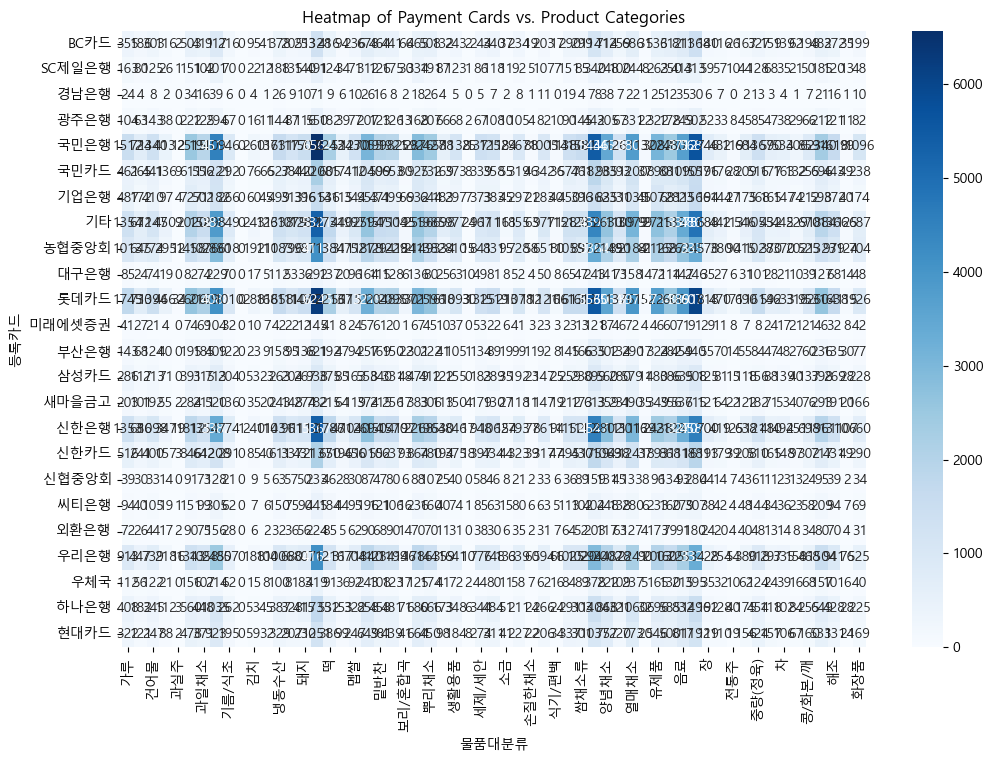


등록카드: 롯데카드의 선호 물품대분류:
물품대분류
열매채소    3971
유제품     3734
양념채소    3564
밀가공     3219
빵       3011
Name: count, dtype: int64

등록카드: 국민은행의 선호 물품대분류:
물품대분류
열매채소    3803
양념채소    3450
유제품     3082
밀가공     3055
빵       2876
Name: count, dtype: int64

등록카드: 기타의 선호 물품대분류:
물품대분류
열매채소    3079
유제품     2715
양념채소    2630
밀가공     2594
빵       2556
Name: count, dtype: int64

등록카드: 신한은행의 선호 물품대분류:
물품대분류
열매채소    3016
양념채소    2802
밀가공     2694
유제품     2438
빵       2268
Name: count, dtype: int64

등록카드: 농협중앙회의 선호 물품대분류:
물품대분류
열매채소    2184
빵       2149
양념채소    2149
유제품     2125
밀가공     1878
Name: count, dtype: int64

등록카드: 우리은행의 선호 물품대분류:
물품대분류
열매채소    2241
유제품     2003
양념채소    2002
밀가공     1840
빵       1786
Name: count, dtype: int64


In [27]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 물품대분류 기준으로 판매횟수 집계
category_counts = df1['물품대분류'].value_counts()

# 3. 판매횟수 기준으로 상위 5개 품목 선택
top_5_categories = category_counts.nlargest(5).index.tolist()

# 4. 상위 5개 품목을 제외한 나머지 데이터
remaining_data = df1[~df1['물품대분류'].isin(top_5_categories)]

# 5. 상위 6개 등록카드 추출
top_6_payment_cards = remaining_data['등록카드'].value_counts().nlargest(6).index.tolist()

# 6. 각 상위 6개 등록카드의 물품대분류 분석
preference_summary = {}
chi2_results = {}

for card in top_6_payment_cards:
    # 해당 등록카드에 대한 데이터 필터링
    card_data = remaining_data[remaining_data['등록카드'] == card]

    # 각 물품대분류별 판매횟수 계산
    top_categories = card_data['물품대분류'].value_counts().nlargest(5)  # 상위 5개 물품대분류
    preference_summary[card] = top_categories

# 카이제곱 검정 수행: 전체 데이터셋을 사용하여 상위 5개 물품대분류와 등록카드 간의 관계를 분석
cross_tab = pd.crosstab(df1['등록카드'], df1['물품대분류'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 7. 결과 출력
print("카이제곱 검정 결과 (등록카드와 물품대분류 간의 관계):")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap of Payment Cards vs. Product Categories')
plt.xlabel('물품대분류')
plt.ylabel('등록카드')
plt.show()  # 히트맵 출력

# 8. 상위 6개 등록카드의 선호 물품대분류 출력
for card, top_categories in preference_summary.items():
    print(f"\n등록카드: {card}의 선호 물품대분류:")
    print(top_categories)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태        668111 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      668111 non-null  object 
 10  제품번호        668111 non-null  object 
 11  주문시간        668111 non-null  object 
 12  주문시_구분      668111 non-null  object 
 13  주문시간_DT     668111 non-null  object 
 14  물품명         668111 non-null  object 
 15  물품대분류       668111 non-null  object 
 16  물품중분류       668111 non-null  object 
 17  식품여부        668111 non-null  object 
 18  배달보관방식      668111 non-null  object 
 19  재분

# 식품/비식품 분리해서 확인

In [92]:
import pandas as pd

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. '식품여부' 기준으로 나머지 데이터 및 상위 6개 등록카드 추출
# 상위 6개 등록카드 추출
top_6_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 3. 상위 6개 등록카드의 데이터 필터링
filtered_data = df1[df1['등록카드'].isin(top_6_payment_cards)]

# 4. '식품여부' 기준으로 그룹화하여 각 등록카드에서 얼마나 많이 팔렸는지 집계
preference_summary = {}

for card in top_6_payment_cards:
    # 해당 등록카드에 대한 데이터 필터링
    card_data = filtered_data[filtered_data['등록카드'] == card]
    
    # '식품여부'에 대한 판매횟수 계산
    top_categories = card_data['식품여부'].value_counts()  # 각 카테고리 별 판매 횟수
    preference_summary[card] = top_categories

# 5. 결과 출력
for card, top_categories in preference_summary.items():
    print(f"등록카드: {card}의 선호 식품여부:")
    print(top_categories)
    print("\n")


등록카드: 롯데카드의 선호 식품여부:
식품여부
식품     91823
비식품     3540
Name: count, dtype: int64


등록카드: 국민은행의 선호 식품여부:
식품여부
식품     87578
비식품     3744
Name: count, dtype: int64


등록카드: 기타의 선호 식품여부:
식품여부
식품     73659
비식품     2770
Name: count, dtype: int64


등록카드: 신한은행의 선호 식품여부:
식품여부
식품     71707
비식품     2565
Name: count, dtype: int64


등록카드: 농협중앙회의 선호 식품여부:
식품여부
식품     56048
비식품     2450
Name: count, dtype: int64


등록카드: 우리은행의 선호 식품여부:
식품여부
식품     52334
비식품     2018
Name: count, dtype: int64




In [100]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 상위 6개 등록카드 추출
top_6_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 3. 상위 6개 등록카드만 필터링한 데이터
filtered_data = df1[df1['등록카드'].isin(top_6_payment_cards)]

# 4. '식품여부'와 '등록카드' 기준으로 교차표 생성
contingency_table = pd.crosstab(filtered_data['등록카드'], filtered_data['신선/일반 분류'])

# 5. 각 그룹의 비율 계산 (열 기준)
percentage_table = (contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100).round(2)  # 각 그룹의 비율을 '%'

# 6. 결과 출력 - 비율 테이블
print("교차표:")
print(contingency_table)
print("\n각 카드사별 비율(%):")
print(percentage_table)

# 7. 카이제곱 테스트 시행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 8. 결과 출력
print("\n카이제곱 테스트 결과:")
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:\n', expected)


교차표:
신선/일반 분류  나머지 식품  신선 식품
등록카드                   
국민은행       53443  37879
기타         45054  31375
농협중앙회      35554  22944
롯데카드       55509  39854
신한은행       43822  30450
우리은행       32210  22142

각 카드사별 비율(%):
신선/일반 분류  나머지 식품  신선 식품
등록카드                   
국민은행       20.12  20.51
기타         16.96  16.99
농협중앙회      13.39  12.43
롯데카드       20.90  21.58
신한은행       16.50  16.49
우리은행       12.13  11.99

카이제곱 테스트 결과:
Chi-squared statistic: 111.42064628011667
p-value: 2.0522081407455081e-22
Degrees of freedom: 5
Expected frequencies:
 [[53870.39824448 37451.60175552]
 [45085.09085902 31343.90914098]
 [34507.68222888 23990.31777112]
 [56254.16425164 39108.83574836]
 [43812.68717739 30459.31282261]
 [32061.9772386  22290.0227614 ]]


In [102]:
import pandas as pd

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. '신선/일반 분류'와 '등록카드' 기준으로 필터링
# 상위 6개 등록카드 추출
top_6_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 3. 각 카드사별 비율 계산
for card in top_6_payment_cards:
    card_data = df1[df1['등록카드'] == card]  # 카드사에 대한 데이터 필터링
    
    # 신선 식품과 나머지 식품 집계
    fresh_count = card_data[card_data['신선/일반 분류'] == '신선 식품'].shape[0]
    others_count = card_data[card_data['신선/일반 분류'] != '신선 식품'].shape[0]

    # 전체 수치에서 비율 계산
    total = fresh_count + others_count
    if total > 0:
        fresh_percentage = (fresh_count / total) * 100
        others_percentage = (others_count / total) * 100
    else:
        fresh_percentage = 0
        others_percentage = 0

    # 결과 출력
    print(f"{card}: 신선 식품 {fresh_percentage:.1f}% / 나머지 식품 {others_percentage:.1f}%")


롯데카드: 신선 식품 41.8% / 나머지 식품 58.2%
국민은행: 신선 식품 41.5% / 나머지 식품 58.5%
기타: 신선 식품 41.1% / 나머지 식품 58.9%
신한은행: 신선 식품 41.0% / 나머지 식품 59.0%
농협중앙회: 신선 식품 39.2% / 나머지 식품 60.8%
우리은행: 신선 식품 40.7% / 나머지 식품 59.3%


In [108]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 식품여부 카테고리 확인
# 상위 6개 등록카드 추출
top_6_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 3. 각 카드사별 비율 계산
for card in top_6_payment_cards:
    card_data = df1[df1['등록카드'] == card]  # 카드사에 대한 데이터 필터링
    
    # 식품여부별 개수 집계
    food_count = card_data[card_data['식품여부'] == '식품'].shape[0]
    non_food_count = card_data[card_data['식품여부'] == '비식품'].shape[0]

    # 전체 수치에서 비율 계산
    total = food_count + non_food_count
    if total > 0:
        food_percentage = (food_count / total) * 100
        non_food_percentage = (non_food_count / total) * 100
    else:
        food_percentage = 0
        non_food_percentage = 0

    # 결과 출력
    print(f"{card}: 식품 {food_percentage:.1f}% / 비식품 {non_food_percentage:.1f}%")

# 4. 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(df1['식품여부'], df1['등록카드'])

# 5. 카이제곱 테스트 시행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 6. 결과 출력
print("\n카이제곱 테스트 결과:")
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:\n', expected)


롯데카드: 식품 96.3% / 비식품 3.7%
국민은행: 식품 95.9% / 비식품 4.1%
기타: 식품 96.4% / 비식품 3.6%
신한은행: 식품 96.5% / 비식품 3.5%
농협중앙회: 식품 95.8% / 비식품 4.2%
우리은행: 식품 96.3% / 비식품 3.7%

카이제곱 테스트 결과:
Chi-squared statistic: 181.78254123197829
p-value: 1.1695178977635794e-26
Degrees of freedom: 23
Expected frequencies:
 [[7.32364646e+02 2.84163853e+02 2.95767021e+01 2.70209717e+02
  3.46282511e+03 1.06654346e+03 9.30869820e+02 2.89809970e+03
  2.21817682e+03 1.62254754e+02 3.61605518e+03 7.73544516e+01
  3.22878998e+02 5.71399133e+02 4.37697272e+02 2.81630874e+03
  1.09684062e+03 1.22022855e+02 2.39457530e+02 1.19596049e+02
  2.06096527e+03 2.16175357e+02 8.81082371e+02 7.01081596e+02]
 [1.85816354e+04 7.20983615e+03 7.50423298e+02 6.85579028e+03
  8.78591749e+04 2.70604565e+04 2.36181302e+04 7.35309003e+04
  5.62798232e+04 4.11674525e+03 9.17469448e+04 1.96264555e+03
  8.19212100e+03 1.44976009e+04 1.11053027e+04 7.14556913e+04
  2.78291594e+04 3.09597714e+03 6.07554247e+03 3.03440395e+03
  5.22910347e+04 5.48482464e

In [110]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 로드
df1 = pd.read_csv('pro3_data.csv')

# 1. 주문취소여부가 '구매취소'인 행 제외
df1 = df1[df1['주문취소여부'] != '구매취소']

# 2. 상위 6개 등록카드 추출
top_6_payment_cards = df1['등록카드'].value_counts().nlargest(6).index.tolist()

# 3. 상위 6개 등록카드의 데이터 필터링
filtered_data = df1[df1['등록카드'].isin(top_6_payment_cards)]

# 4. 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(filtered_data['식품여부'], filtered_data['등록카드'])

# 5. 카이제곱 테스트 시행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 6. 결과 출력
print("Card and Food Type Cross-Tabulation:")
print(contingency_table)
print("\n카이제곱 테스트 결과:")
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:\n', expected)


Card and Food Type Cross-Tabulation:
등록카드   국민은행     기타  농협중앙회   롯데카드   신한은행   우리은행
식품여부                                          
비식품    3744   2770   2450   3540   2565   2018
식품    87578  73659  56048  91823  71707  52334

카이제곱 테스트 결과:
Chi-squared statistic: 80.62261665833212
p-value: 6.217032481428914e-16
Degrees of freedom: 5
Expected frequencies:
 [[ 3465.78019972  2900.57286179  2220.06975453  3619.14103048
   2818.71210654  2062.72404694]
 [87856.21980028 73528.42713821 56277.93024547 91743.85896952
  71453.28789346 52289.27595306]]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태        668111 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      668111 non-null  object 
 10  제품번호        668111 non-null  object 
 11  주문시간        668111 non-null  object 
 12  주문시_구분      668111 non-null  object 
 13  주문시간_DT     668111 non-null  object 
 14  물품명         668111 non-null  object 
 15  물품대분류       668111 non-null  object 
 16  물품중분류       668111 non-null  object 
 17  식품여부        668111 non-null  object 
 18  배달보관방식      668111 non-null  object 
 19  재분

In [9]:
df['수도권여부'].value_counts()

수도권여부
지방     562274
수도권    105837
Name: count, dtype: int64

In [11]:
df['주소지'].value_counts()

주소지
경기도        119598
서울특별시       79657
부산광역시       77516
경상남도        67855
경상북도        38708
대구광역시       37920
강원도         31117
전라북도        29667
충청남도        29148
충청북도        27405
대전광역시       26198
인천광역시       26180
울산광역시       23299
전라남도        19854
광주광역시       19169
세종특별자치시      6963
제주특별자치도      6874
경기            666
광주            270
강원             24
서울             23
Name: count, dtype: int64

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('pro3_data.csv')  # 데이터를 적절히 로드하세요

# 1. 주소지별 물품 대분류 분포 크로스테이블 생성
cross_tab = pd.crosstab(data['주소지'], data['물품대분류'])
print("주소지별 물품 대분류 크로스테이블:\n", cross_tab)

주소지별 물품 대분류 크로스테이블:
 물품대분류      가루  건강일반   건어물   견과  과실주    과일  과일채소    과자  기름/식초  김장채소  ...  \
주소지                                                                 ...   
강원          1     0     0    1    0     3     1     0      0     0  ...   
강원도       605   261   485  144    2   704   530  1334    327     0  ...   
경기         11     3     8    2    0    23    11    30      7     0  ...   
경기도      2083  1060  1800  558   36  3160  2354  5555   1267     1  ...   
경상남도     1213   606  1074  347   19  1750  1396  2813    717     0  ...   
경상북도      677   335   573  187    4   909   750  2045    428     0  ...   
광주          3     4     2    1    0     2     4     9      3     0  ...   
광주광역시     318   150   290  108    1   487   412   983    181     0  ...   
대구광역시     732   338   424  171    9  1083   840  1872    363     0  ...   
대전광역시     392   206   365  113    4   692   442  1298    280     0  ...   
부산광역시    1378   702  1073  387   13  1976  1764  3833    757     0  ...   
서울  

IndexError: index 20 is out of bounds for axis 0 with size 20

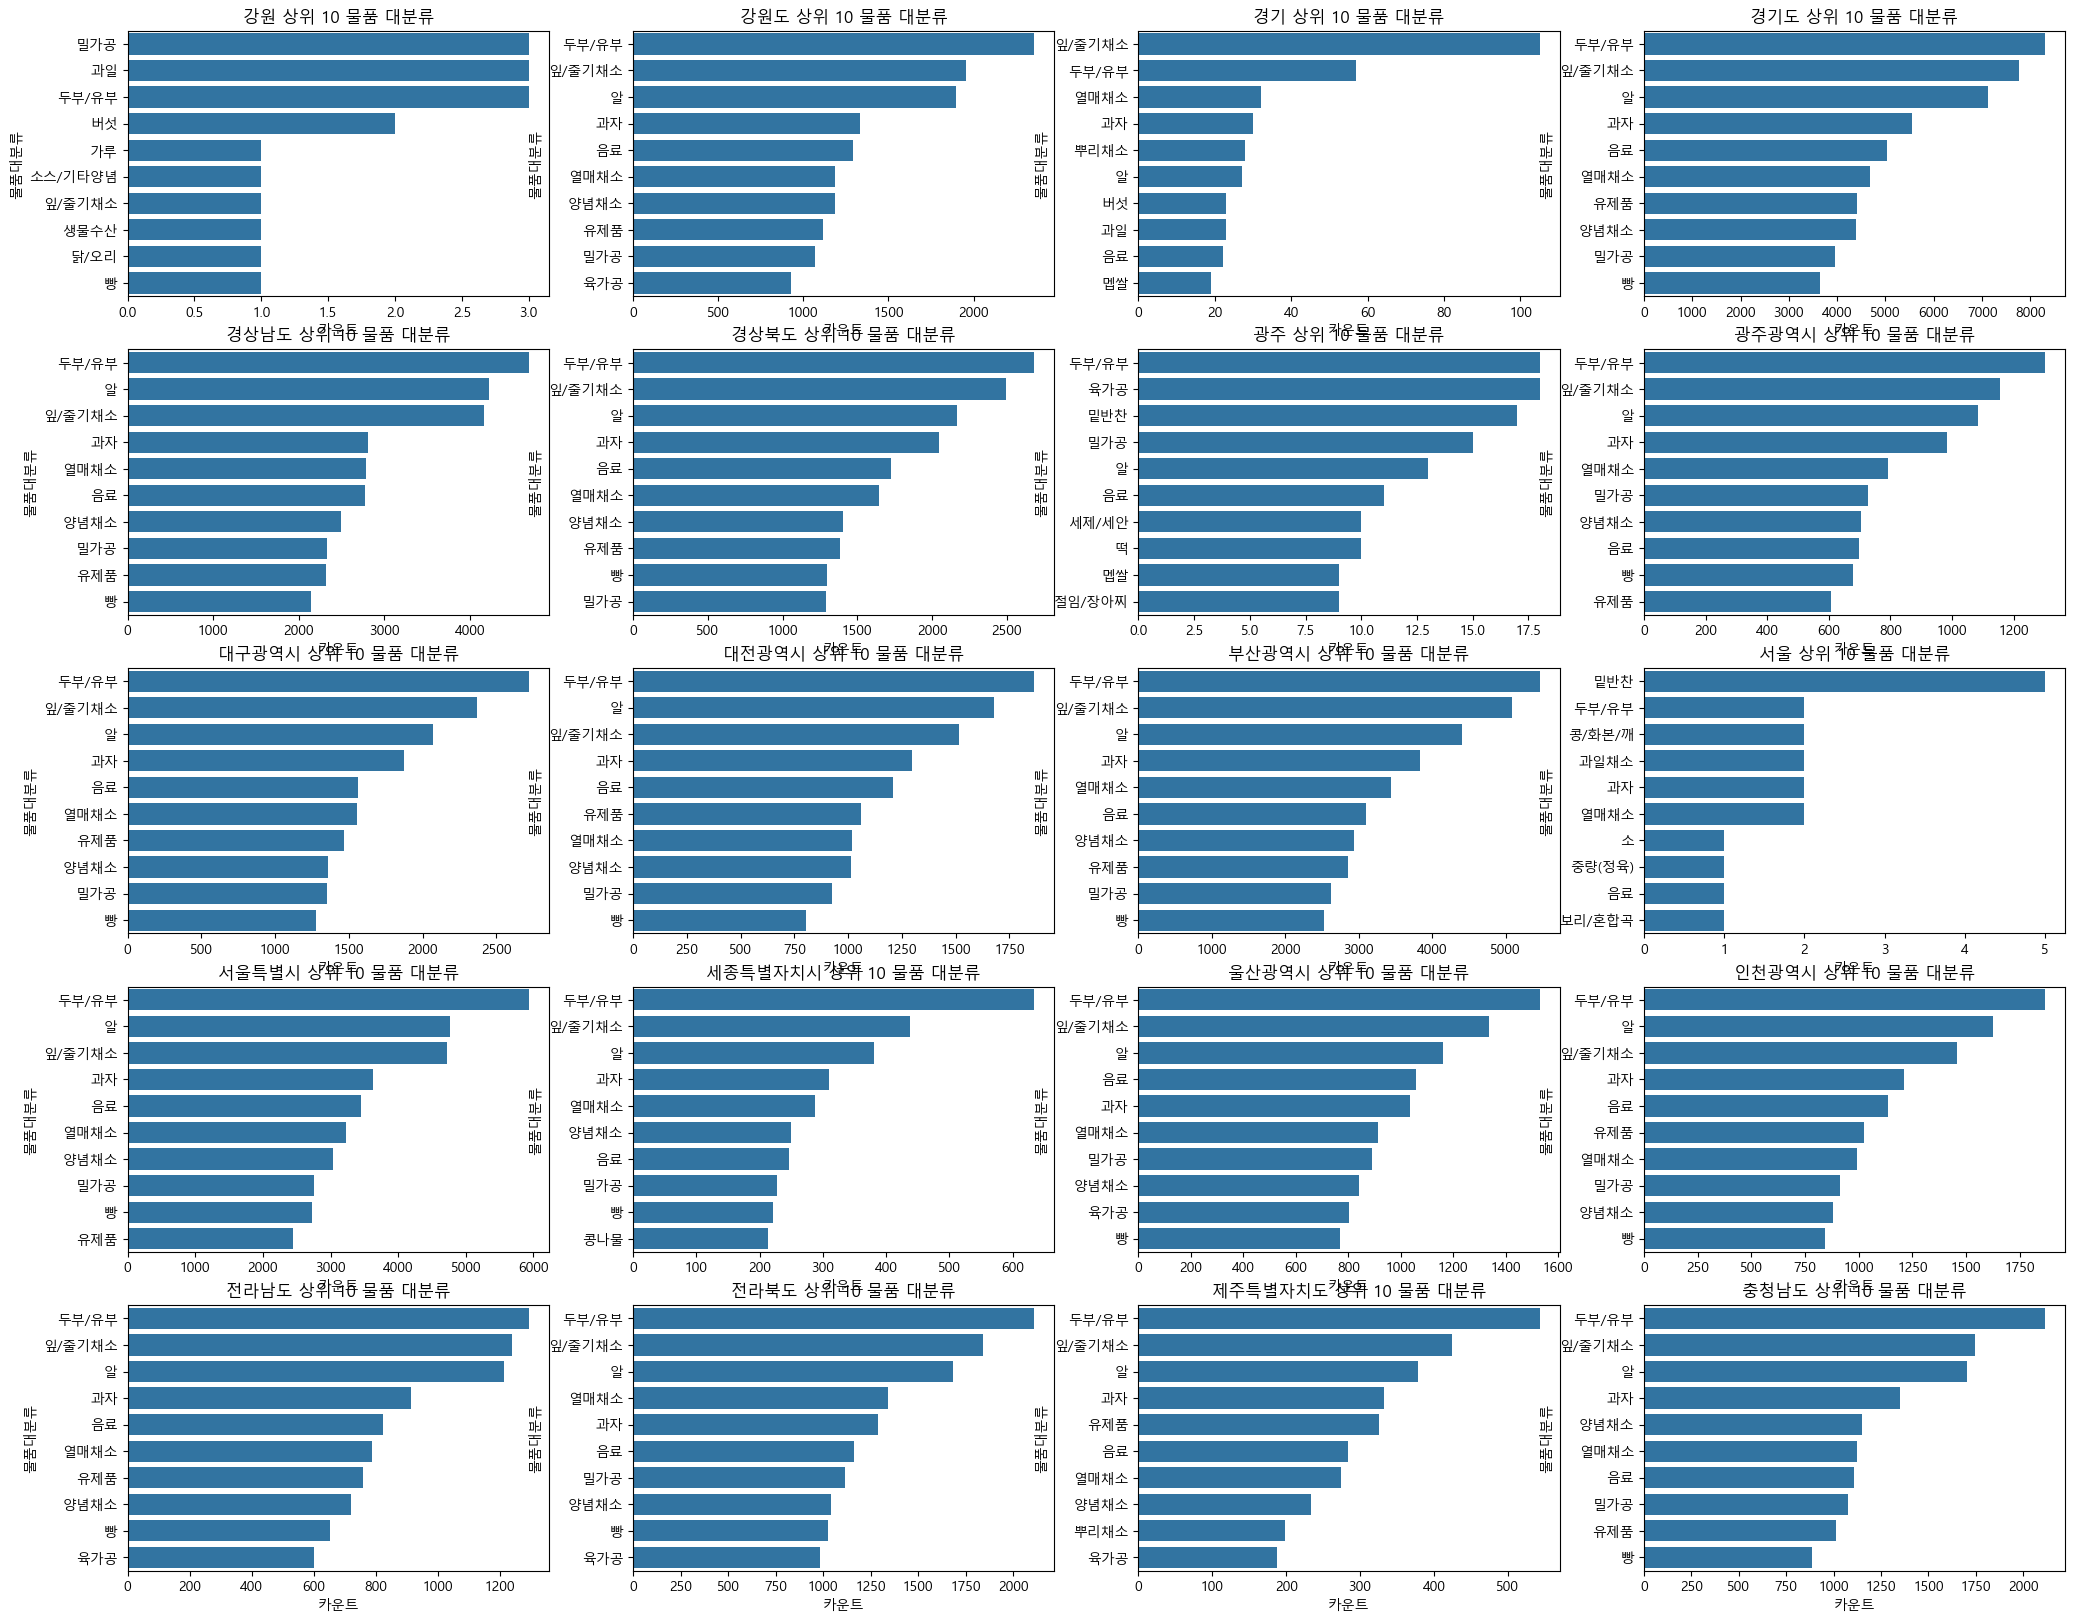

In [23]:
# 상위 10개 물품 대분류 추출 및 시각화
n_top_items = 10

# 플롯 그리기 위한 설정
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 20))
axes = axes.flatten()

# 각 주소지별 상위 10개 물품 대분류 추출 및 플롯 그리기
for i, (local, group) in enumerate(cross_tab.iterrows()):
    top_items = group.sort_values(ascending=False).head(n_top_items)
    
    # 산출된 데이터 기반으로 막대그래프 생성
    sns.barplot(x=top_items.values, y=top_items.index, ax=axes[i])
    axes[i].set_title(f'{local} 상위 {n_top_items} 물품 대분류')
    axes[i].set_xlabel('카운트')
    axes[i].set_ylabel('물품대분류')

# 플롯 레이아웃 조정 및 시각화
plt.tight_layout()
plt.show()



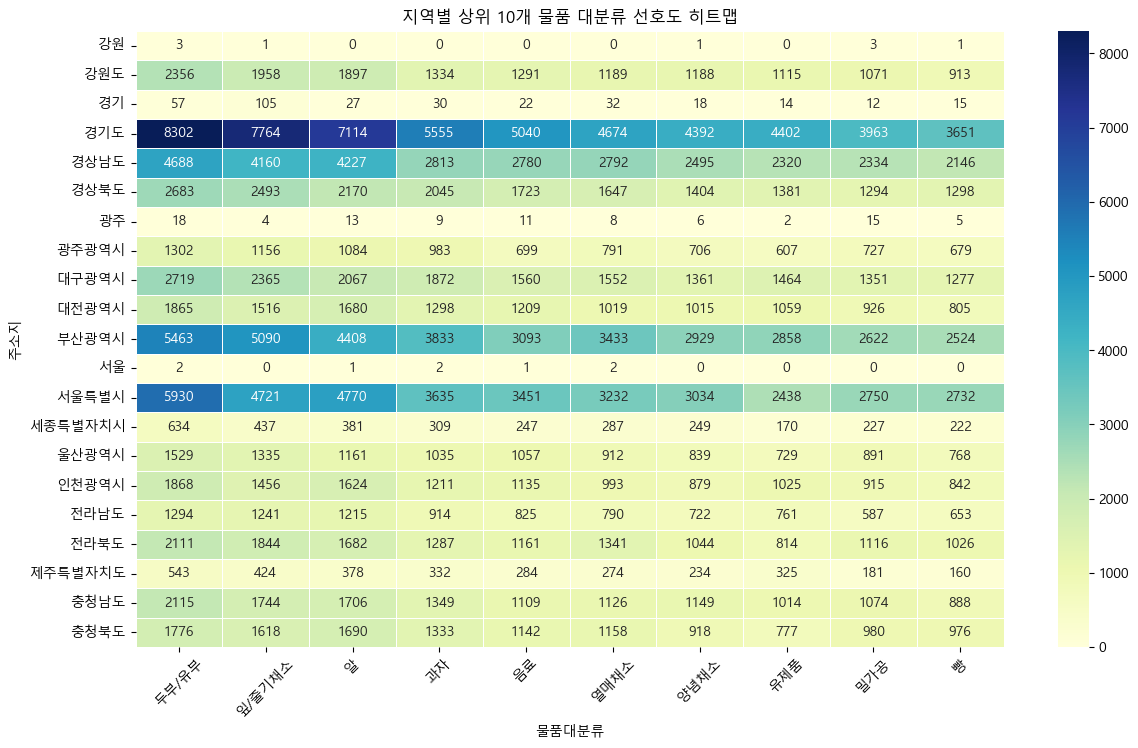

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('pro3_data.csv')  # 데이터를 적절히 로드하세요

# 1. 주소지별 물품 대분류 분포 크로스테이블 생성
cross_tab = pd.crosstab(data['주소지'], data['물품대분류'])

# 2. 전체 데이터에서 상위 10개 물품 대분류 추출
top_10_items = cross_tab.sum().sort_values(ascending=False).head(10).index

# 상위 10개 대분류만 포함한 크로스테이블 생성
cross_tab_top_10 = cross_tab[top_10_items]

# 3. 히트맵 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_top_10, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')
plt.title('지역별 상위 10개 물품 대분류 선호도 히트맵')
plt.xlabel('물품대분류')
plt.ylabel('주소지')
plt.xticks(rotation=45)
plt.show()


In [11]:
df1['구매수량'].describe()

count    668111.000000
mean          1.192044
std           0.694327
min           0.050000
25%           1.000000
50%           1.000000
75%           1.000000
max          75.000000
Name: 구매수량, dtype: float64

In [13]:
a = pd.read_csv('sales_data.csv')

In [15]:
a['구매수량'].describe()

count    668111.000000
mean          1.192044
std           0.694327
min           0.050000
25%           1.000000
50%           1.000000
75%           1.000000
max          75.000000
Name: 구매수량, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태        668111 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      668111 non-null  object 
 10  제품번호        668111 non-null  object 
 11  주문시간        668111 non-null  object 
 12  주문시_구분      668111 non-null  object 
 13  주문시간_DT     668111 non-null  object 
 14  물품명         668111 non-null  object 
 15  물품대분류       668111 non-null  object 
 16  물품중분류       668111 non-null  object 
 17  식품여부        668111 non-null  object 
 18  배달보관방식      668111 non-null  object 
 19  재분

In [33]:
df['성별'].value_counts()

성별
여    626101
남     42010
Name: count, dtype: int64

카이제곱 검정 결과:
Chi2: 12.348354877337028
P-value: 0.0020825182120726765
Degrees of Freedom: 2
Expected Frequencies:
[[ 1692.5279388    880.55930558  1672.91275563]
 [25401.4720612  13215.44069442 25107.08724437]]


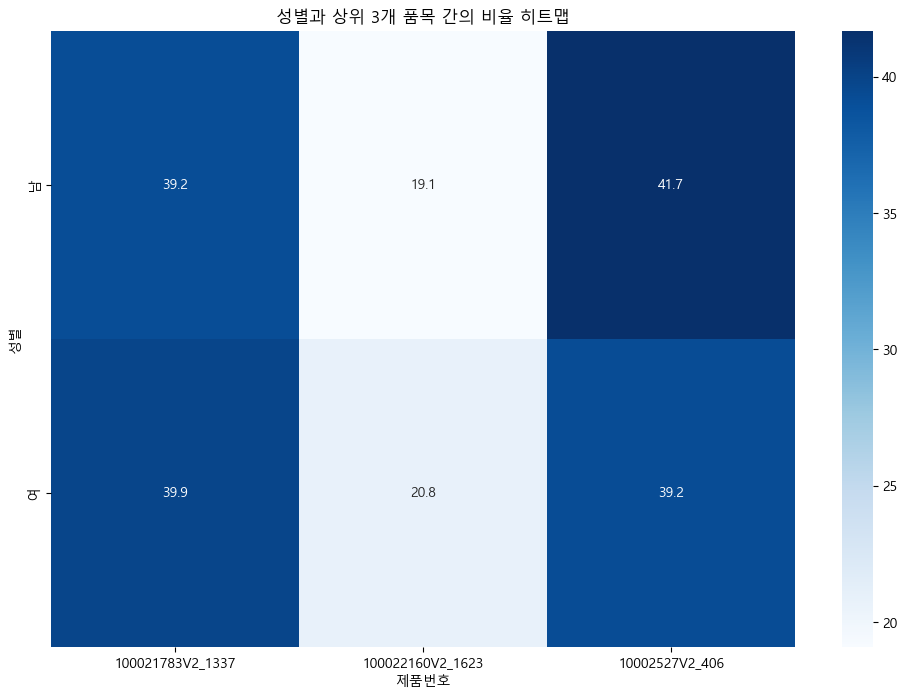

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 데이터프레임을 생성합니다 (예: CSV 파일에서 불러오기)
df = pd.read_csv('pro3_data.csv')  # 파일 경로에 따라 변경하세요.

# 1. '제품번호' 기준으로 판매 횟수 세기
product_counts = df['제품번호'].value_counts()  # 제품번호별 판매 횟수
top_5_products = product_counts.nlargest(3).index.tolist()  # 상위 5개 제품번호 추출

# 2. 상위 5개 품목에 대해서만 데이터 필터링
filtered_data = df[df['제품번호'].isin(top_5_products)]

# 3. 성별과 제품번호 간의 크로스탭 생성
crosstab = pd.crosstab(filtered_data['성별'], filtered_data['제품번호'])

# 4. 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(crosstab)

# 5. 카이제곱 검정 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 6. 크로스탭의 비율 계산
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100  # 비율 계산

# 7. 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_percentage, annot=True, fmt='.1f', cmap='Blues')
plt.title('성별과 상위 3개 품목 간의 비율 히트맵')
plt.xlabel('제품번호')
plt.ylabel('성별')
plt.show()


카이제곱 검정 결과:
Chi2: 5.136888299001547
P-value: 0.2735380727426655
Degrees of Freedom: 4
Expected Frequencies:
[[ 459.7426529   310.19186303  437.73012091  426.9759068   269.35945636]
 [7748.2573471  5227.80813697 7377.26987909 7196.0240932  4539.64054364]]


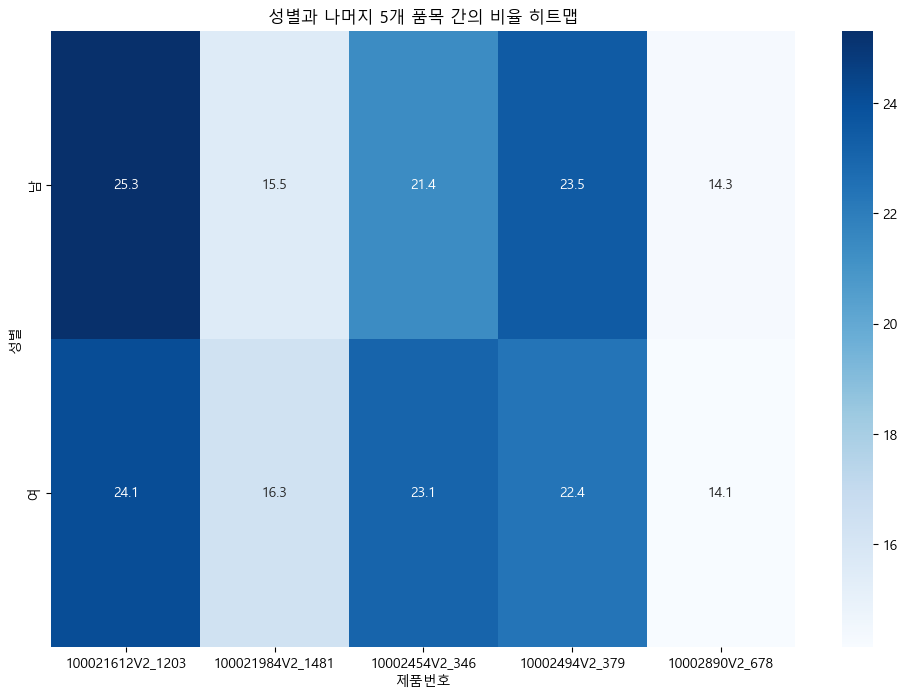


남의 선호 물품:
  성별      물품명  판매수
3  남       오이  482
1  남  동물복지유정란  447
0  남       당근  407
4  남       중파  296
2  남     백미/유  272

여의 선호 물품:
  성별      물품명   판매수
8  여       오이  7726
5  여       당근  7408
6  여  동물복지유정란  7176
9  여       중파  5242
7  여     백미/유  4537


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 데이터프레임을 생성합니다 (예: CSV 파일에서 불러오기)
df = pd.read_csv('pro3_data.csv')  # 파일 경로에 따라 변경하세요.

# 1. '제품번호' 기준으로 판매 횟수 세기
product_counts = df['제품번호'].value_counts()  # 제품번호별 판매 횟수
top_10_products = product_counts.nlargest(10).index.tolist()  # 상위 10개 제품번호 추출

# 2. 상위 10개 품목 중 5개를 제외하고 나머지 5개 품목 선택
excluded_products = top_10_products[:5]  # 상위 10개 중 첫 5개
remaining_products = top_10_products[5:]  # 나머지 5개

# 3. 성별과 물품명 간의 크로스탭 생성 (나머지 5개 제품에 대해)
filtered_data = df[df['제품번호'].isin(remaining_products)]
crosstab = pd.crosstab(filtered_data['성별'], filtered_data['제품번호'])

# 4. 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(crosstab)

# 5. 카이제곱 검정 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 6. 크로스탭의 비율 계산
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100  # 비율 계산

# 7. 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_percentage, annot=True, fmt='.1f', cmap='Blues')
plt.title('성별과 나머지 5개 품목 간의 비율 히트맵')
plt.xlabel('제품번호')
plt.ylabel('성별')
plt.show()

# 8. 성별별 선호 순위 계산 (물품명 사용)
# 판매 수를 세어 성별과 물품명을 기준으로 그룹화
preference_summary = filtered_data.groupby(['성별', '물품명']).size().reset_index(name='판매수')

# 성별 별 선호 순위를 출력
for gender in preference_summary['성별'].unique():
    print(f"\n{gender}의 선호 물품:")
    gender_preference = preference_summary[preference_summary['성별'] == gender]
    # 판매수 기준으로 정렬하여 선호 순위 출력
    gender_preference = gender_preference.sort_values(by='판매수', ascending=False)
    print(gender_preference)
